# Data Visualisation

## About the Data
In this notebook, we will be working with FIFA players data for 2022 obtained from [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset)

## Setup
We will be working with the `players_22.csv` file, so we need to handle our imports and read it in.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
players = pd.read_csv(
    'players_22.csv', 
    usecols=['short_name', 'wage_eur', 'age', 'club_name', 'nationality_name',
             'preferred_foot', 'height_cm', 'weight_kg', 'overall', 'potential']
)

Let us look at some rows:

In [ ]:
players.head()

,short_name,overall,potential,wage_eur,age,height_cm,weight_kg,club_name,nationality_name,preferred_foot
0,L. Messi,93,93,320000.0,34,170,72,Paris Saint-Germain,Argentina,Left
1,R. Lewandowski,92,92,270000.0,32,185,81,FC Bayern München,Poland,Right
2,Cristiano Ronaldo,91,91,270000.0,36,187,83,Manchester United,Portugal,Right
3,Neymar Jr,91,91,270000.0,29,175,68,Paris Saint-Germain,Brazil,Right
4,K. De Bruyne,91,91,350000.0,30,181,70,Manchester City,Belgium,Right


The `info()` method can pinpoint missing values and wrong data types:

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   overall           19239 non-null  int64  
 2   potential         19239 non-null  int64  
 3   wage_eur          19178 non-null  float64
 4   age               19239 non-null  int64  
 5   height_cm         19239 non-null  int64  
 6   weight_kg         19239 non-null  int64  
 7   club_name         19178 non-null  object 
 8   nationality_name  19239 non-null  object 
 9   preferred_foot    19239 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


Let's check for duplicated rows with the `duplicated()` method:

In [ ]:
players[players.duplicated()].shape[0]

0

We will use `dropna()` to drop rows where any column has a null value:

In [ ]:
players.dropna(inplace=True)

Checking unique values in `nationality_name` column with `unique()` method

In [ ]:
players.nationality_name.unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'Slovenia',
       'France', 'Germany', 'England', 'Korea Republic', 'Netherlands',
       'Senegal', 'Egypt', 'Italy', 'Spain', 'Uruguay', 'Costa Rica',
       'Norway', 'Croatia', 'Scotland', 'Algeria', 'Slovakia', 'Denmark',
       'Switzerland', 'Hungary', 'Gabon', 'Serbia', 'Nigeria', 'Morocco',
       'Sweden', 'Austria', 'Montenegro', "Côte d'Ivoire", 'Mexico',
       'Bosnia and Herzegovina', 'Finland', 'Greece', 'Armenia',
       'Colombia', 'Cameroon', 'Ghana', 'Wales', 'Russia', 'Turkey',
       'United States', 'Jamaica', 'Canada', 'Czech Republic', 'Chile',
       'Ukraine', 'Venezuela', 'Togo', 'Burkina Faso', 'Northern Ireland',
       'Congo DR', 'Israel', 'Albania', 'Guinea', 'Iceland', 'China PR',
       'New Zealand', 'Central African Republic', 'Peru', 'Mali', 'Japan',
       'North Macedonia', 'Ecuador', 'Iran', 'Republic of Ireland',
       'Angola', 'Romania', 'Mozambique', 'Cape Verde Islands',
     

## Plotting Player's average wage by Nationality

Text(0.5, 1.0, 'Average Wage by Nationality')

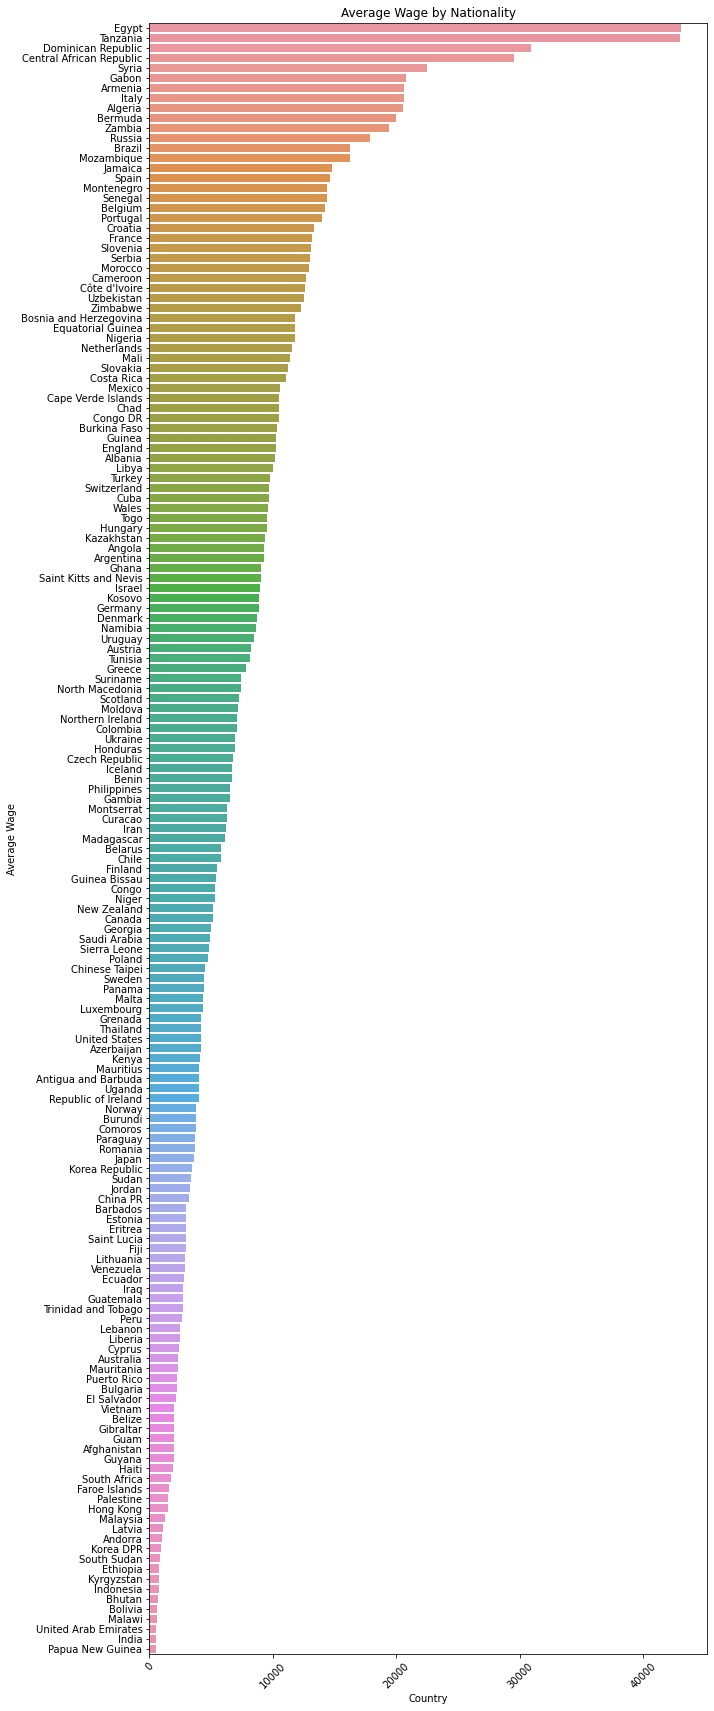

In [ ]:
# Average wage by nationality
country_list = list(players.nationality_name.unique())
country_wage_ratio = []
for i in country_list:
  x = players[players['nationality_name'] == i]
  country_wage_rate = sum(x.wage_eur)/len(x)
  country_wage_ratio.append(country_wage_rate)
data = pd.DataFrame({'country_list': country_list, 'country_wage_ratio': country_wage_ratio})
new_index = (data.country_wage_ratio.sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(10,30))
sns.barplot(x=sorted_data['country_wage_ratio'], y=sorted_data['country_list'])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average Wage')
plt.title('Average Wage by Nationality')

## Plotting percentage of players according to preferred foot

Text(0.5, 1.0, 'Percentage of players according to preferred foot')

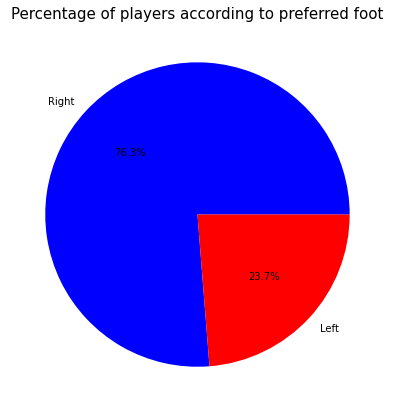

In [ ]:
# Percentage of players according to preferred foot
labels = players.preferred_foot.value_counts().index
colours = ['blue', 'red']
sizes = players.preferred_foot.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, colors=colours, autopct='%1.1f%%')
plt.title('Percentage of players according to preferred foot', fontsize = 15)

## Plotting Wage against Overall points

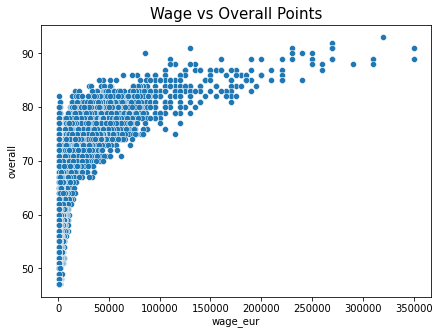

In [ ]:
# Wage vs Overall
plt.figure(figsize = (7,5))
sns.scatterplot(x="wage_eur", y="overall", data=players)
plt.title('Wage vs Overall Points', fontsize = 15)
plt.show()